# 최종 전처리 코드

In [1]:
import os
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# 한글폰트 깨짐 방지
# 이 부분은 실행 툴 따라서 변경해주세요! 현재 주피터 기준입니다
# 윈도우에서는 'Malgun Gothic', 맥에서는 'AppleGothic'
import matplotlib as mlp

mlp.rcParams['font.family'] ='Malgun Gothic'
mlp.rcParams['axes.unicode_minus'] =False

# 1. 파일 Import

In [3]:
df_1=pd.read_csv("C:\\Users\\songa\\Downloads\\DM_data\\2021년도(상).csv")
df_2=pd.read_csv("C:\\Users\\songa\\Downloads\\DM_data\\2021년도(하).csv")

df_3=pd.read_csv("C:\\Users\\songa\\Downloads\\DM_data\\2022년도(상).csv")
df_4=pd.read_csv("C:\\Users\\songa\\Downloads\\DM_data\\2022년도(하).csv")

df_5 = pd.read_csv("C:\\Users\\songa\\Downloads\\DM_data\\2023년도(상).csv", encoding='cp949')
df_6 = pd.read_csv("C:\\Users\\songa\\Downloads\\DM_data\\2023년도(하).csv", encoding='cp949')


In [4]:
# 모든 데이터프레임을 리스트에 담기
dataframes = [df_1, df_2, df_3, df_4, df_5, df_6]

# 데이터프레임 병합
data = pd.concat(dataframes, axis=0, ignore_index=True)

# 원본 데이터 확인
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746065 entries, 0 to 4746064
Data columns (total 15 columns):
 #   Column  Dtype  
---  ------  -----  
 0   접수일시    object 
 1   예정일시    object 
 2   배차일시    object 
 3   승차일시    object 
 4   하차일시    object 
 5   취소일시    object 
 6   출발지구    object 
 7   출발지동    object 
 8   목적지구    object 
 9   목적지동    object 
 10  이용목적    object 
 11  요금      object 
 12  승차거리    float64
 13  차량구분    object 
 14  유형      object 
dtypes: float64(1), object(14)
memory usage: 543.1+ MB


# 2. 취소일시, 이용목적, 차량구분 삭제

In [6]:
# 취소일시, 이용목적, 차량구분 열 제거 + '시트' 열 삭제
data.drop(columns=['취소일시','이용목적','차량구분'], inplace=True)

# 삭제 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746065 entries, 0 to 4746064
Data columns (total 12 columns):
 #   Column  Dtype  
---  ------  -----  
 0   접수일시    object 
 1   예정일시    object 
 2   배차일시    object 
 3   승차일시    object 
 4   하차일시    object 
 5   출발지구    object 
 6   출발지동    object 
 7   목적지구    object 
 8   목적지동    object 
 9   요금      object 
 10  승차거리    float64
 11  유형      object 
dtypes: float64(1), object(11)
memory usage: 434.5+ MB


# 3. 결측치 삭제 및 시각화

In [7]:
# 결측치 확인
print("각 열의 결측값 개수:")
print(data.isnull().sum())

각 열의 결측값 개수:
접수일시          0
예정일시          0
배차일시     521226
승차일시     740597
하차일시     739361
출발지구        105
출발지동        105
목적지구        141
목적지동        141
요금            0
승차거리     434013
유형      2973701
dtype: int64


<AxesSubplot:>

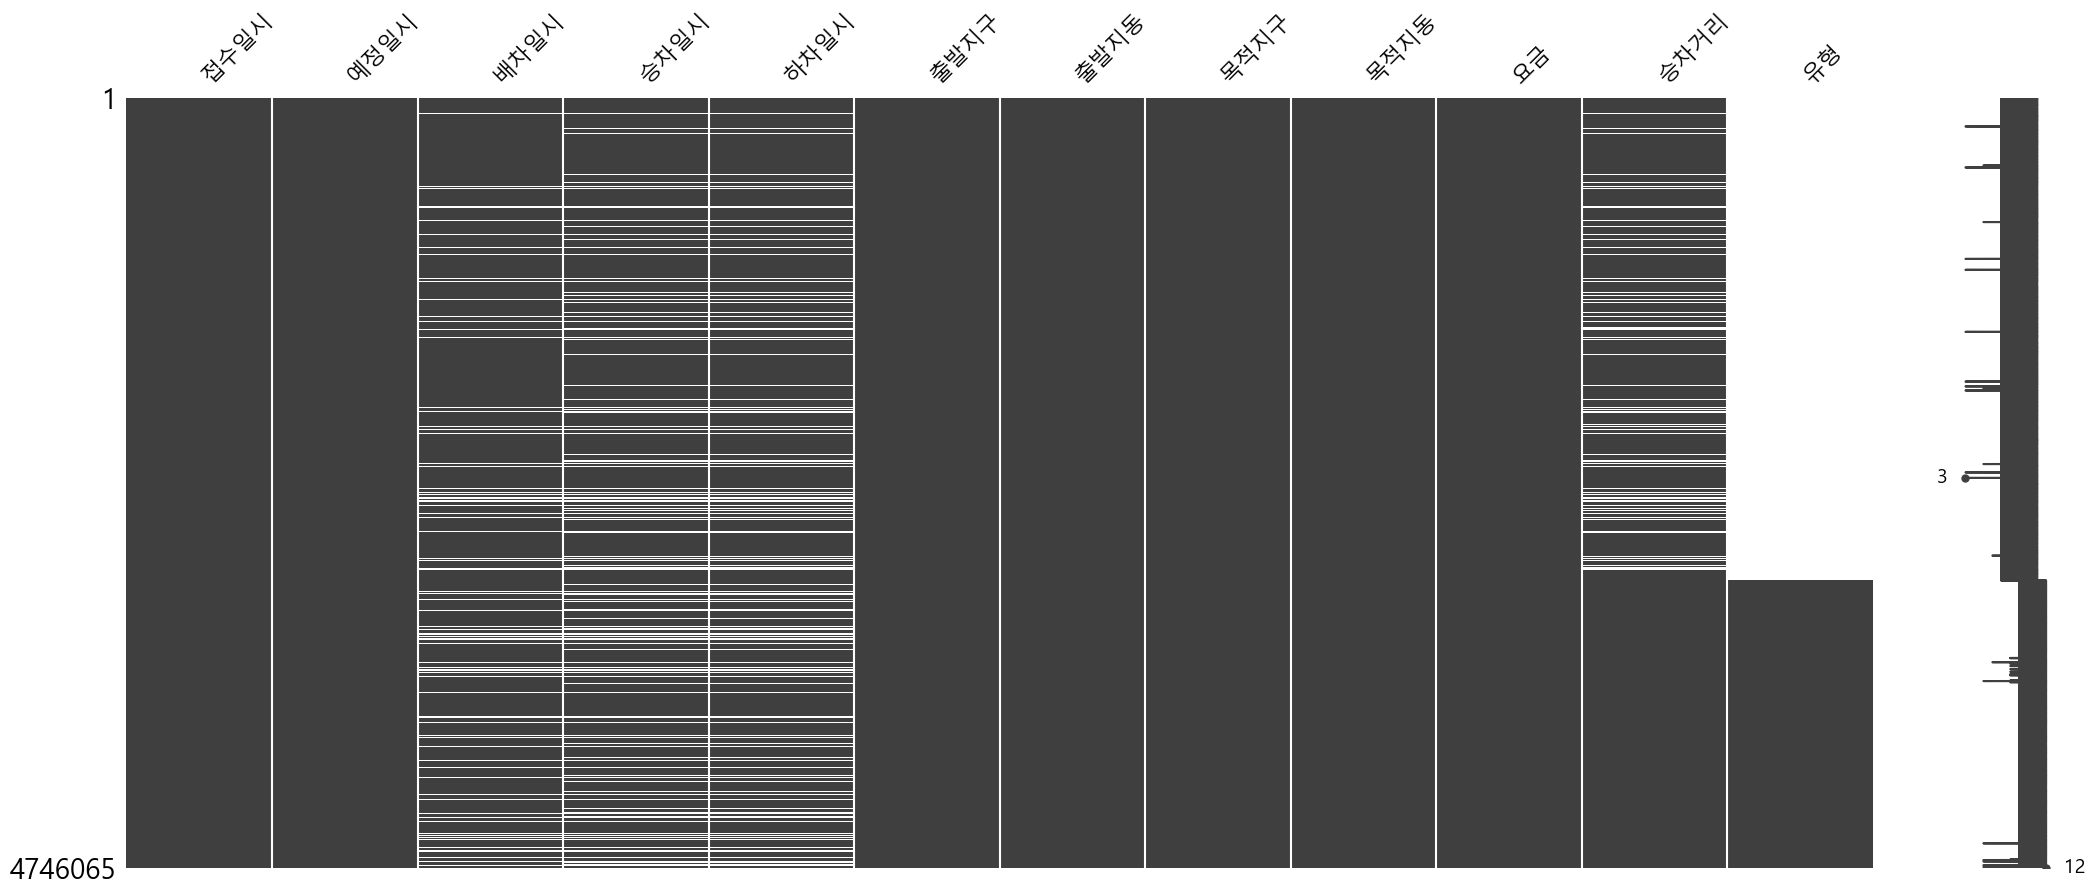

In [8]:
import missingno

# 결측치 시각화
missingno.matrix(data)

In [24]:
# 결측치가 포함된 모든 행 제거
data = data.dropna()

# 결측치 제거 후 확인
print("결측치 제거 후 각 열의 결측치 확인:")
print(data.isnull().sum())

결측치 제거 후 각 열의 결측치 확인:
접수일시    0
예정일시    0
배차일시    0
승차일시    0
하차일시    0
출발지구    0
출발지동    0
목적지구    0
목적지동    0
요금      0
승차거리    0
dtype: int64


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746065 entries, 0 to 4746064
Data columns (total 12 columns):
 #   Column  Dtype  
---  ------  -----  
 0   접수일시    object 
 1   예정일시    object 
 2   배차일시    object 
 3   승차일시    object 
 4   하차일시    object 
 5   출발지구    object 
 6   출발지동    object 
 7   목적지구    object 
 8   목적지동    object 
 9   요금      object 
 10  승차거리    float64
 11  유형      object 
dtypes: float64(1), object(11)
memory usage: 434.5+ MB


# 4. 접수일시, 예정일시, 배차일시와 승차일시 상관관계

In [13]:
# '승차일시'와 각각 '접수일시', '예정일시', '배차일시' 간의 상관관계 계산

# NaT 값을 제거하여 각 열의 상관관계 계산을 위한 클린 데이터셋 생성
filtered_data = data[['승차일시', '접수일시', '예정일시', '배차일시']].dropna()

# '승차일시' 열을 datetime 형식으로 변환
filtered_data['승차일시'] = pd.to_datetime(filtered_data['승차일시'])
filtered_data['접수일시'] = pd.to_datetime(filtered_data['접수일시'])
filtered_data['예정일시'] = pd.to_datetime(filtered_data['예정일시'])
filtered_data['배차일시'] = pd.to_datetime(filtered_data['배차일시'])

# 상관관계를 위해 날짜 데이터를 ordinal 형식으로 변환
filtered_data['승차일시_ordinal'] = filtered_data['승차일시'].apply(lambda x: x.toordinal())
filtered_data['접수일시_ordinal'] = filtered_data['접수일시'].apply(lambda x: x.toordinal())
filtered_data['예정일시_ordinal'] = filtered_data['예정일시'].apply(lambda x: x.toordinal())
filtered_data['배차일시_ordinal'] = filtered_data['배차일시'].apply(lambda x: x.toordinal())

# 상관관계 계산을 위해 ordinal 열만 선택
승차_상관관계 = filtered_data[['승차일시_ordinal', '접수일시_ordinal', '예정일시_ordinal', '배차일시_ordinal']].corr()

# '승차일시_ordinal'과 다른 열들과의 상관관계만 선택하여 시리즈 형태로 저장
승차_상관관계_series = 승차_상관관계['승차일시_ordinal'][['접수일시_ordinal', '예정일시_ordinal', '배차일시_ordinal']]
승차_상관관계_series


접수일시_ordinal    1.0
예정일시_ordinal    1.0
배차일시_ordinal    1.0
Name: 승차일시_ordinal, dtype: float64

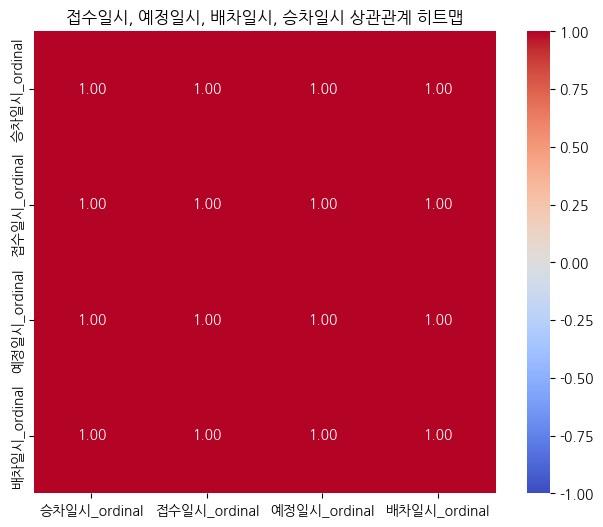

In [14]:
# 승차일시, 접수일시, 예정일시, 배차일시 전체 상관관계 행렬을 시각화하기 위한 히트맵

# 한글 폰트 설정
mlp.rcParams['font.family'] = 'NanumGothic'

# 히트맵 설정
plt.figure(figsize=(8, 6))
sns.heatmap(승차_상관관계, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", square=True)

# 그래프 제목 추가
plt.title("접수일시, 예정일시, 배차일시, 승차일시 상관관계 히트맵")

# 그래프 출력
plt.show()


# 5. '대기시간' 컬럼 추가
- 컬럼명: '대기시간'
- 단위: 분

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746065 entries, 0 to 4746064
Data columns (total 12 columns):
 #   Column  Dtype  
---  ------  -----  
 0   접수일시    object 
 1   예정일시    object 
 2   배차일시    object 
 3   승차일시    object 
 4   하차일시    object 
 5   출발지구    object 
 6   출발지동    object 
 7   목적지구    object 
 8   목적지동    object 
 9   요금      object 
 10  승차거리    float64
 11  유형      object 
dtypes: float64(1), object(11)
memory usage: 434.5+ MB


In [16]:
# '접수일시'와 '승차일시' 열을 기준으로 대기시간 생성
data['접수일시'] = pd.to_datetime(data['접수일시'], errors='coerce')
data['승차일시'] = pd.to_datetime(data['승차일시'], errors='coerce')

# '접수일시'와 '승차일시' 간의 차이를 계산하여 '대기시간_분' 열에 분 단위로 추가
data['대기시간'] = (data['승차일시'] - data['접수일시']).dt.total_seconds() / 60

In [17]:
# 데이터 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746065 entries, 0 to 4746064
Data columns (total 13 columns):
 #   Column  Dtype         
---  ------  -----         
 0   접수일시    datetime64[ns]
 1   예정일시    object        
 2   배차일시    object        
 3   승차일시    datetime64[ns]
 4   하차일시    object        
 5   출발지구    object        
 6   출발지동    object        
 7   목적지구    object        
 8   목적지동    object        
 9   요금      object        
 10  승차거리    float64       
 11  유형      object        
 12  대기시간    float64       
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 470.7+ MB


# 6. '공휴일' 컬럼 추가
- 컬럼명: '공휴일'
- 값: 공휴일 = 1, 공휴일이 아니면 = 0

In [18]:
!pip install workalendar

from workalendar.asia import SouthKorea

# 2019년부터 2023년까지 공휴일 데이터를 가져오기

years = list(range(2019, 2024))

# SouthKorea 클래스 인스턴스 생성
cal = SouthKorea()

all_holidays = []

# 각 연도의 공휴일 정보 가져오기
for year in years:
    holiday_list = cal.holidays(year)
    all_holidays.extend(holiday_list)

# 공휴일 정보를 DataFrame으로 변환
holiday_df = pd.DataFrame(all_holidays, columns=['날짜', '공휴일'])

holiday_df

,날짜,공휴일
0,2019-01-01,New year
1,2019-02-04,Korean New Year's Day
2,2019-02-05,Korean New Year's Day
3,2019-02-06,Korean New Year's Day
4,2019-03-01,Independence Day
...,...,...
70,2023-09-29,Midautumn Festival
71,2023-09-30,Midautumn Festival
72,2023-10-03,National Foundation Day
73,2023-10-09,Hangul Day


In [19]:
# '날짜' 열을 datetime 형식으로 변환
holiday_df['날짜'] = pd.to_datetime(holiday_df['날짜']).dt.date

# '접수일시'를 기준으로 '공휴일여부' 컬럼 추가, 기존 '접수일시' 값은 변하지 않음
data['공휴일'] = data['접수일시'].dt.date.apply(lambda x: 1 if x in holiday_df['날짜'].values else 0)

# 결과 확인
data.head()

,접수일시,예정일시,배차일시,승차일시,하차일시,출발지구,출발지동,목적지구,목적지동,요금,승차거리,유형,대기시간,공휴일
0,2021-01-01 00:04:45,2021-01-01 00:04:45,2021-01-01 00:05:53,2021-01-01 00:28:00,2021-01-01 00:38:36,강남구,수서동,강남구,개포4동,2000,6550.0,NaN,23.250000,1
1,2021-01-01 00:06:54,2021-01-01 00:06:54,2021-01-01 00:18:20,2021-01-01 00:38:11,2021-01-01 01:15:17,관악구,대학동,광진구,구의제3동,3800,22908.0,NaN,31.283333,1
2,2021-01-01 00:21:06,2021-01-01 00:21:06,2021-01-01 00:30:51,2021-01-01 01:11:27,2021-01-01 01:44:06,서초구,서초1동,구로구,가리봉동,3100,12790.0,NaN,50.350000,1
3,2021-01-01 00:25:41,2021-01-01 00:26:00,2021-01-01 00:34:10,2021-01-01 00:57:07,2021-01-01 01:20:01,성동구,왕십리도선동,강남구,수서동,3100,13072.0,NaN,31.433333,1
4,2021-01-01 00:38:53,2021-01-01 00:38:53,NaN,NaT,NaN,마포구,서교동,강서구,염창동,,NaN,NaN,NaN,1


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746065 entries, 0 to 4746064
Data columns (total 14 columns):
 #   Column  Dtype         
---  ------  -----         
 0   접수일시    datetime64[ns]
 1   예정일시    object        
 2   배차일시    object        
 3   승차일시    datetime64[ns]
 4   하차일시    object        
 5   출발지구    object        
 6   출발지동    object        
 7   목적지구    object        
 8   목적지동    object        
 9   요금      object        
 10  승차거리    float64       
 11  유형      object        
 12  대기시간    float64       
 13  공휴일     int64         
dtypes: datetime64[ns](2), float64(2), int64(1), object(9)
memory usage: 506.9+ MB


# 7. 서울-서울 필터링

In [21]:
# 출발지구 열의 고유 값 확인
departure_zones = data['출발지구'].unique()
print("출발지구에 포함된 값들:")
print(departure_zones)

# 목적지구 열의 고유 값 확인
destination_zones = data['목적지구'].unique()
print("\n목적지구에 포함된 값들:")
print(destination_zones)

출발지구에 포함된 값들:
['강남구' '관악구' '서초구' '성동구' '마포구' '도봉구' '강서구' '구로구' '부천시원미구' '성북구' '강북구'
 '노원구' '영등포구' '강동구' '서대문구' '중랑구' '양천구' '송파구' '금천구' '광진구' '동작구' '동대문구'
 '종로구' '은평구' '용산구' '중구' '양주시' '김포시' '의정부시' '부천시소사구' '안양시만안구' '남양주시' '하남시'
 '과천시' '고양시일산동구' '구리시' '고양시덕양구' '안양시동안구' '성남시분당구' '고양시일산서구' '부천시오정구'
 '성남시수정구' '광명시' '성남시중원구' '부평구' '남동구' '수원시팔달구' '용인시수지구' '수원시권선구' nan '양평군'
 '서구' '계양구' '군포시' '시흥시' '파주시' '연천군' '용인시처인구' '수원시영통구' '안산시단원구' '연수구' '여주군'
 '포천시' '안산시상록구' '안성시' '동두천시' '용인시기흥구']

목적지구에 포함된 값들:
['강남구' '광진구' '구로구' '강서구' '노원구' '도봉구' '중랑구' '성동구' '종로구' '성북구' '광명시' '서대문구'
 '관악구' '서초구' '마포구' '영등포구' '송파구' '강동구' '양천구' '동대문구' '성남시분당구' '중구' '은평구'
 '강북구' '부천시오정구' '용산구' '하남시' '고양시일산동구' '금천구' '고양시덕양구' '양주시' '남양주시' '구리시'
 '성남시수정구' '동작구' '김포시' '의정부시' '부천시원미구' '부천시소사구' '안양시동안구' '안양시만안구' '과천시'
 '고양시일산서구' '성남시중원구' '파주시' '시흥시' '연수구' '양평군' '서구' '부평구' '수원시영통구' '용인시수지구'
 '수원시팔달구' '용인시기흥구' '남동구' '동구' '계양구' '광주시' '안산시상록구' '수원시권선구' nan '안산시단원구'
 '오산시' '동두천시' '남구' '군포시' '가평군' '평택시' '강화군' '화성시' '의왕시' '연천군' '용인시처

In [22]:
# 남기고 싶은 구 리스트 정의
seoul_regions = [
    "강서구", "강남구", "동작구", "영등포구", "은평구", "도봉구", "강북구", "관악구",
    "노원구", "금천구", "중랑구", "광진구", "서대문구", "송파구", "성동구",
    "성북구", "마포구", "양천구", "강동구", "용산구", "중구", "종로구",
    "동대문구", "서초구", "구로구"
]

# 출발지구와 목적지구가 모두 valid_zones에 포함된 행만 남기기
data = data[(data['출발지구'].isin(seoul_regions)) & (data['목적지구'].isin(seoul_regions))]

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4421178 entries, 0 to 4746064
Data columns (total 14 columns):
 #   Column  Dtype         
---  ------  -----         
 0   접수일시    datetime64[ns]
 1   예정일시    object        
 2   배차일시    object        
 3   승차일시    datetime64[ns]
 4   하차일시    object        
 5   출발지구    object        
 6   출발지동    object        
 7   목적지구    object        
 8   목적지동    object        
 9   요금      object        
 10  승차거리    float64       
 11  유형      object        
 12  대기시간    float64       
 13  공휴일     int64         
dtypes: datetime64[ns](2), float64(2), int64(1), object(9)
memory usage: 506.0+ MB


In [23]:
data

,접수일시,예정일시,배차일시,승차일시,하차일시,출발지구,출발지동,목적지구,목적지동,요금,승차거리,유형,대기시간,공휴일
0,2021-01-01 00:04:45,2021-01-01 00:04:45,2021-01-01 00:05:53,2021-01-01 00:28:00,2021-01-01 00:38:36,강남구,수서동,강남구,개포4동,2000,6550.0,NaN,23.250000,1
1,2021-01-01 00:06:54,2021-01-01 00:06:54,2021-01-01 00:18:20,2021-01-01 00:38:11,2021-01-01 01:15:17,관악구,대학동,광진구,구의제3동,3800,22908.0,NaN,31.283333,1
2,2021-01-01 00:21:06,2021-01-01 00:21:06,2021-01-01 00:30:51,2021-01-01 01:11:27,2021-01-01 01:44:06,서초구,서초1동,구로구,가리봉동,3100,12790.0,NaN,50.350000,1
3,2021-01-01 00:25:41,2021-01-01 00:26:00,2021-01-01 00:34:10,2021-01-01 00:57:07,2021-01-01 01:20:01,성동구,왕십리도선동,강남구,수서동,3100,13072.0,NaN,31.433333,1
4,2021-01-01 00:38:53,2021-01-01 00:38:53,NaN,NaT,NaN,마포구,서교동,강서구,염창동,,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4746059,2023-12-31 23:57:23,2023-12-31 23:57:00,2024-01-01 01:06:05,2024-01-01 01:24:48,2024-01-01 01:36:30,강북구,번제1동,노원구,월계2동,1500,3057.0,지체,87.416667,0
4746060,2023-12-31 23:56:14,2023-12-31 23:57:00,2024-01-01 01:16:08,2024-01-01 01:37:11,2024-01-01 02:07:51,관악구,청림동,강동구,고덕제1동,3800,23435.0,지체,100.950000,0
4746061,2023-12-31 23:57:28,2023-12-31 23:58:00,2024-01-01 01:18:35,2024-01-01 01:45:06,2024-01-01 01:58:42,영등포구,여의동,은평구,증산동,2900,9339.0,지체,107.633333,0
4746062,2023-12-31 23:57:17,2023-12-31 23:58:00,2024-01-01 01:11:39,2024-01-01 01:31:02,2024-01-01 01:47:56,영등포구,여의동,은평구,증산동,2900,9078.0,지체,93.750000,0


In [24]:
# 출발지구 열의 고유 값 확인
departure_zones = data['출발지구'].unique()
print("출발지구에 포함된 값들:")
print(departure_zones)

# 목적지구 열의 고유 값 확인
destination_zones = data['목적지구'].unique()
print("\n목적지구에 포함된 값들:")
print(destination_zones)

출발지구에 포함된 값들:
['강남구' '관악구' '서초구' '성동구' '마포구' '도봉구' '강서구' '구로구' '성북구' '강북구' '노원구' '강동구'
 '서대문구' '영등포구' '중랑구' '양천구' '송파구' '금천구' '광진구' '동작구' '동대문구' '종로구' '은평구'
 '용산구' '중구']

목적지구에 포함된 값들:
['강남구' '광진구' '구로구' '강서구' '노원구' '도봉구' '중랑구' '종로구' '성북구' '서대문구' '관악구' '서초구'
 '성동구' '마포구' '영등포구' '송파구' '강동구' '양천구' '동대문구' '중구' '은평구' '강북구' '용산구' '금천구'
 '동작구']


# 8. 이상치 처리

## 8.1 승차거리가 0인 행 제거

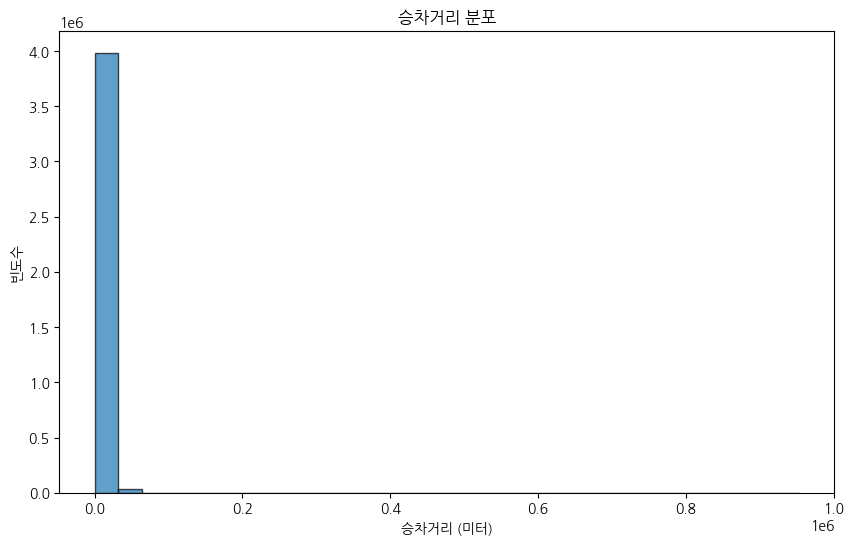

In [25]:
import matplotlib.pyplot as plt

# 승차거리 분포를 히스토그램으로 시각화
plt.figure(figsize=(10, 6))
plt.hist(data['승차거리'].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('승차거리 (미터)')
plt.ylabel('빈도수')
plt.title('승차거리 분포')
plt.show()

In [26]:
# 승차거리가 0인 데이터 개수 확인
zero_ride_time_count = data[data['승차거리'] == 0].shape[0]

# 승차거리가 0인 데이터가 0보다 많으면 해당 행 삭제
if zero_ride_time_count > 0:
    data = data[data['승차거리'] != 0]
    print(f"승차거리가 0인 {zero_ride_time_count}개의 행이 삭제되었습니다.")
else:
    print("승차거리가 0인 데이터가 없습니다.")

# 결과 확인
data.head()

승차거리가 0인 300486개의 행이 삭제되었습니다.


,접수일시,예정일시,배차일시,승차일시,하차일시,출발지구,출발지동,목적지구,목적지동,요금,승차거리,유형,대기시간,공휴일
0,2021-01-01 00:04:45,2021-01-01 00:04:45,2021-01-01 00:05:53,2021-01-01 00:28:00,2021-01-01 00:38:36,강남구,수서동,강남구,개포4동,2000,6550.0,NaN,23.250000,1
1,2021-01-01 00:06:54,2021-01-01 00:06:54,2021-01-01 00:18:20,2021-01-01 00:38:11,2021-01-01 01:15:17,관악구,대학동,광진구,구의제3동,3800,22908.0,NaN,31.283333,1
2,2021-01-01 00:21:06,2021-01-01 00:21:06,2021-01-01 00:30:51,2021-01-01 01:11:27,2021-01-01 01:44:06,서초구,서초1동,구로구,가리봉동,3100,12790.0,NaN,50.350000,1
3,2021-01-01 00:25:41,2021-01-01 00:26:00,2021-01-01 00:34:10,2021-01-01 00:57:07,2021-01-01 01:20:01,성동구,왕십리도선동,강남구,수서동,3100,13072.0,NaN,31.433333,1
4,2021-01-01 00:38:53,2021-01-01 00:38:53,NaN,NaT,NaN,마포구,서교동,강서구,염창동,,NaN,NaN,NaN,1


## 8.2 대기시간이 음수인 행 제거

In [27]:
# 대기시간이 음수인 데이터 확인
음수_대기시간_count = data[data['대기시간'] < 0].shape[0]

# 대기시간이 음수인 데이터가 있을 경우 해당 행 삭제
if 음수_대기시간_count > 0:
    data = data[data['대기시간'] >= 0]
    print(f"대기시간이 음수인 {음수_대기시간_count}개의 행이 삭제되었습니다.")
else:
    print("대기시간이 음수인 데이터가 없습니다.")

# 결과 확인
data.head()

대기시간이 음수인 2개의 행이 삭제되었습니다.


,접수일시,예정일시,배차일시,승차일시,하차일시,출발지구,출발지동,목적지구,목적지동,요금,승차거리,유형,대기시간,공휴일
0,2021-01-01 00:04:45,2021-01-01 00:04:45,2021-01-01 00:05:53,2021-01-01 00:28:00,2021-01-01 00:38:36,강남구,수서동,강남구,개포4동,2000,6550.0,NaN,23.250000,1
1,2021-01-01 00:06:54,2021-01-01 00:06:54,2021-01-01 00:18:20,2021-01-01 00:38:11,2021-01-01 01:15:17,관악구,대학동,광진구,구의제3동,3800,22908.0,NaN,31.283333,1
2,2021-01-01 00:21:06,2021-01-01 00:21:06,2021-01-01 00:30:51,2021-01-01 01:11:27,2021-01-01 01:44:06,서초구,서초1동,구로구,가리봉동,3100,12790.0,NaN,50.350000,1
3,2021-01-01 00:25:41,2021-01-01 00:26:00,2021-01-01 00:34:10,2021-01-01 00:57:07,2021-01-01 01:20:01,성동구,왕십리도선동,강남구,수서동,3100,13072.0,NaN,31.433333,1
5,2021-01-01 00:44:41,2021-01-01 00:45:00,2021-01-01 00:50:24,2021-01-01 01:12:03,2021-01-01 01:23:12,도봉구,쌍문제2동,노원구,상계1동,1500,3590.0,NaN,27.366667,1


## 8.3 대기시간 이상치 처리(IQR)

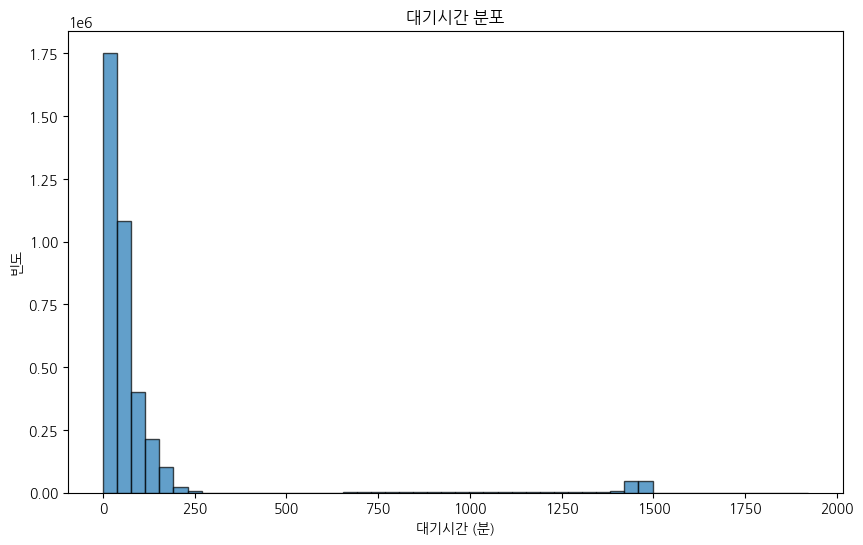

In [28]:
# 대기시간 분포 확인
plt.figure(figsize=(10, 6))
plt.hist(data['대기시간'], bins=50, edgecolor='k', alpha=0.7)
plt.title('대기시간 분포')
plt.xlabel('대기시간 (분)')
plt.ylabel('빈도')
plt.show()

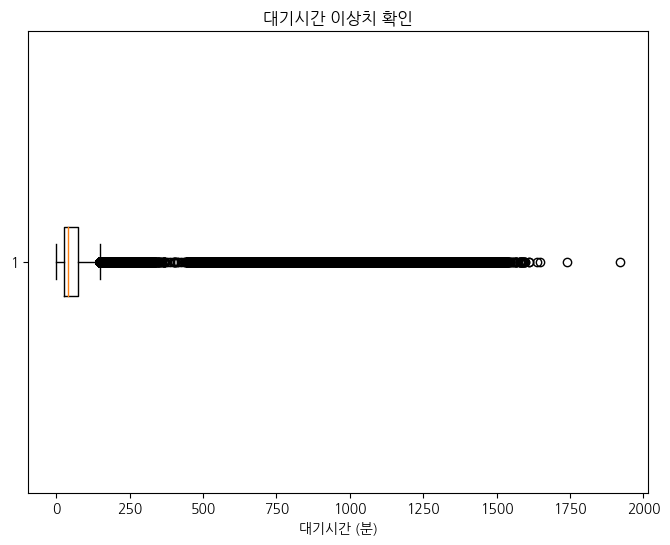

In [29]:
# 대기시간의 이상치를 시각화
plt.figure(figsize=(8, 6))
plt.boxplot(data['대기시간'].dropna(), vert=False)
plt.xlabel('대기시간 (분)')
plt.title('대기시간 이상치 확인')

# 그래프 출력
plt.show()

In [30]:
# 대기시간 이상치 탐지 및 처리: IQR 방식
Q1 = data['대기시간'].quantile(0.25)  # 1사분위
Q3 = data['대기시간'].quantile(0.75)  # 3사분위
IQR = Q3 - Q1  # IQR 계산

# 이상치 범위 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# IQR 방식으로 이상치 제거
data = data[(data['대기시간'] >= lower_bound) & (data['대기시간'] <= upper_bound)]

# 이상치 제거 후 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3405569 entries, 0 to 4746064
Data columns (total 14 columns):
 #   Column  Dtype         
---  ------  -----         
 0   접수일시    datetime64[ns]
 1   예정일시    object        
 2   배차일시    object        
 3   승차일시    datetime64[ns]
 4   하차일시    object        
 5   출발지구    object        
 6   출발지동    object        
 7   목적지구    object        
 8   목적지동    object        
 9   요금      object        
 10  승차거리    float64       
 11  유형      object        
 12  대기시간    float64       
 13  공휴일     int64         
dtypes: datetime64[ns](2), float64(2), int64(1), object(9)
memory usage: 389.7+ MB


## 8.5 해당년도가 아닌 행 삭제

In [31]:
import pandas as pd

# datetime 형식으로 변환
# 이미 datatime으로 변환되었다면 주석처리하고 진행해주세요!
date_columns = ['접수일시', '예정일시', '배차일시', '승차일시', '하차일시']
for col in date_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')

# 2021, 2022, 2023년 범위 내의 데이터만 남기고, 나머지 데이터는 제외
non_year_rows = data[~data[date_columns].apply(lambda x: x.dt.year.isin([2021, 2022, 2023])).all(axis=1)]

# 해당년이 아닌 날짜가 있는지 확인 후 처리
if not non_year_rows.empty:
    print("설정년도가 아닌 날짜가 포함된 행이 있습니다. 해당 행을 삭제합니다.")
    # 해당년이 아닌 날짜가 있는 행 삭제
    data = data[data[date_columns].apply(lambda x: x.dt.year.isin([2021, 2022, 2023])).all(axis=1)]
    print(f"삭제 후 남은 행 수: {len(data)}")
else:
    print("모든 날짜가 설정하신 년도입니다. 삭제할 행이 없습니다.")

# 결과 확인
print("데이터 확인:")
print(data.head())

설정년도가 아닌 날짜가 포함된 행이 있습니다. 해당 행을 삭제합니다.
삭제 후 남은 행 수: 3405212
데이터 확인:
                 접수일시                예정일시                배차일시  \
0 2021-01-01 00:04:45 2021-01-01 00:04:45 2021-01-01 00:05:53   
1 2021-01-01 00:06:54 2021-01-01 00:06:54 2021-01-01 00:18:20   
2 2021-01-01 00:21:06 2021-01-01 00:21:06 2021-01-01 00:30:51   
3 2021-01-01 00:25:41 2021-01-01 00:26:00 2021-01-01 00:34:10   
5 2021-01-01 00:44:41 2021-01-01 00:45:00 2021-01-01 00:50:24   

                 승차일시                하차일시 출발지구    출발지동 목적지구   목적지동    요금  \
0 2021-01-01 00:28:00 2021-01-01 00:38:36  강남구     수서동  강남구   개포4동  2000   
1 2021-01-01 00:38:11 2021-01-01 01:15:17  관악구     대학동  광진구  구의제3동  3800   
2 2021-01-01 01:11:27 2021-01-01 01:44:06  서초구    서초1동  구로구   가리봉동  3100   
3 2021-01-01 00:57:07 2021-01-01 01:20:01  성동구  왕십리도선동  강남구    수서동  3100   
5 2021-01-01 01:12:03 2021-01-01 01:23:12  도봉구   쌍문제2동  노원구   상계1동  1500   

      승차거리   유형       대기시간  공휴일  
0   6550.0  NaN  23.250000    1  
1  22908.0  NaN 

In [32]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3405212 entries, 0 to 4746014
Data columns (total 14 columns):
 #   Column  Dtype         
---  ------  -----         
 0   접수일시    datetime64[ns]
 1   예정일시    datetime64[ns]
 2   배차일시    datetime64[ns]
 3   승차일시    datetime64[ns]
 4   하차일시    datetime64[ns]
 5   출발지구    object        
 6   출발지동    object        
 7   목적지구    object        
 8   목적지동    object        
 9   요금      object        
 10  승차거리    float64       
 11  유형      object        
 12  대기시간    float64       
 13  공휴일     int64         
dtypes: datetime64[ns](5), float64(2), int64(1), object(6)
memory usage: 389.7+ MB
None


# 9. 출발지구별 Top5 기준 필터링

## 9.1 출발지구별 이용 수 상위 5개 갯수 확인

In [33]:
# 출발지구별 이용수 상위 5개 추출
top_departure_areas = data['출발지구'].value_counts().head(5)

# 상위 5개 지역을 확인
print(top_departure_areas)

# 출발지동별 이용 건수 상위 5개 추출
top_departure_areas2 = data['출발지동'].value_counts().head(5)

# 상위 5개 지역을 확인
print(top_departure_areas2)

노원구     371543
강서구     234175
서대문구    192083
은평구     190745
강동구     184958
Name: 출발지구, dtype: int64
하계1동      85690
상계6.7동    67852
신촌동       65507
성산제2동     55873
연희동       41551
Name: 출발지동, dtype: int64


## 9.2 출발지구별 이용 수 상위 5개 필터링
- 인덱스 재생성

In [34]:
# 출발지구별 이용 건수 상위 5개를 먼저 추출하고, 이 상위 5개만 남겨둔 데이터프레임을 구성
top_departure_areas = data['출발지구'].value_counts().head(5).index
data = data[data['출발지구'].isin(top_departure_areas)]
data = data.reset_index(drop=True)

# 상위 5개 출발지구만 남긴 데이터프레임을 확인
data.head()

,접수일시,예정일시,배차일시,승차일시,하차일시,출발지구,출발지동,목적지구,목적지동,요금,승차거리,유형,대기시간,공휴일
0,2021-01-01 02:25:24,2021-01-01 02:26:00,2021-01-01 02:35:36,2021-01-01 02:56:15,2021-01-01 03:32:21,강서구,등촌제3동,종로구,종로5.6가동,3400,17553.0,NaN,30.850000,1
1,2021-01-01 04:17:19,2021-01-01 04:17:19,2021-01-01 04:27:09,2021-01-01 04:50:16,2021-01-01 04:58:55,노원구,중계4동,노원구,하계1동,1500,2967.0,NaN,32.950000,1
2,2021-01-01 04:41:40,2021-01-01 04:42:00,2021-01-01 04:50:36,2021-01-01 05:07:33,2021-01-01 05:53:06,강동구,길동,강서구,염창동,4400,31641.0,NaN,25.883333,1
3,2021-01-01 02:55:01,2021-01-01 05:00:00,2021-01-01 04:36:19,2021-01-01 04:58:37,2021-01-01 05:06:43,서대문구,홍제제1동,서대문구,충현동,1500,3808.0,NaN,123.600000,1
4,2021-01-01 03:25:01,2021-01-01 05:30:00,2021-01-01 05:10:43,2021-01-01 05:27:55,2021-01-01 05:41:49,노원구,월계2동,성북구,안암동,1700,5390.0,NaN,122.900000,1


In [35]:
# 필터링 후 데이터 갯수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1173504 entries, 0 to 1173503
Data columns (total 14 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   접수일시    1173504 non-null  datetime64[ns]
 1   예정일시    1173504 non-null  datetime64[ns]
 2   배차일시    1173504 non-null  datetime64[ns]
 3   승차일시    1173504 non-null  datetime64[ns]
 4   하차일시    1173504 non-null  datetime64[ns]
 5   출발지구    1173504 non-null  object        
 6   출발지동    1173504 non-null  object        
 7   목적지구    1173504 non-null  object        
 8   목적지동    1173504 non-null  object        
 9   요금      1173504 non-null  object        
 10  승차거리    1170226 non-null  float64       
 11  유형      418591 non-null   object        
 12  대기시간    1173504 non-null  float64       
 13  공휴일     1173504 non-null  int64         
dtypes: datetime64[ns](5), float64(2), int64(1), object(6)
memory usage: 125.3+ MB


## 9.3 출발지구별 이용 수 상위 5개 갯수 전과 같은지 확인

In [36]:
# 출발지구별 이용 건수 상위 5개확인
top_departure_areas = data['출발지구'].value_counts().head(5)

# 상위 5개 지역을 확인
print(top_departure_areas)

# 출발지동별 이용 건수 상위 5개 확인
top_departure_areas2 = data['출발지동'].value_counts().head(5)

# 상위 5개 지역을 확인
print(top_departure_areas2)

노원구     371543
강서구     234175
서대문구    192083
은평구     190745
강동구     184958
Name: 출발지구, dtype: int64
하계1동      85690
상계6.7동    67852
신촌동       65507
연희동       41551
역촌동       39787
Name: 출발지동, dtype: int64


## 유형 컬럼 제거

In [37]:
data = data.drop(columns=['유형'])


# 10. 승차거리가 평균 이하인 컬럼만 남기기

In [40]:
# '승차거리'의 평균값 계산
mean_distance = data['승차거리'].mean()

# 승차거리의 평균값 확인
mean_distance


7207.509395621017

In [41]:
# 평균값 미만인 경우만 필터링
filtered_data = data[data['승차거리'] < mean_distance]

# 결과 확인
print(filtered_data)


                       접수일시                예정일시                배차일시  \
1       2021-01-01 04:17:19 2021-01-01 04:17:19 2021-01-01 04:27:09   
3       2021-01-01 02:55:01 2021-01-01 05:00:00 2021-01-01 04:36:19   
4       2021-01-01 03:25:01 2021-01-01 05:30:00 2021-01-01 05:10:43   
5       2021-01-01 06:43:55 2021-01-01 07:00:00 2021-01-01 07:08:35   
6       2021-01-01 04:55:00 2021-01-01 07:00:00 2021-01-01 07:06:59   
...                     ...                 ...                 ...   
1173497 2023-12-31 20:38:56 2023-12-31 20:39:00 2023-12-31 21:29:55   
1173498 2023-12-31 20:52:16 2023-12-31 20:52:16 2023-12-31 21:37:25   
1173500 2023-12-31 21:35:31 2023-12-31 21:36:00 2023-12-31 22:14:00   
1173502 2023-12-31 22:21:37 2023-12-31 22:22:00 2023-12-31 23:17:31   
1173503 2023-12-31 22:27:04 2023-12-31 22:27:04 2023-12-31 23:19:02   

                       승차일시                하차일시  출발지구    출발지동  목적지구   목적지동  \
1       2021-01-01 04:50:16 2021-01-01 04:58:55   노원구    중계4동   노원구  

# 11. 날씨 컬럼 추가(일시, 평균기온(°C), 일강수량(mm), 안개 계속시간(hr))

## 11.1 날씨 데이터 불러오기

In [44]:
# 날씨 데이터 불러오기
df_weather=pd.read_csv("C:\\Users\\songa\\Downloads\\DM_data\\final_weather.csv", encoding='cp949')

# 필요한 컬럼만 선택
df_weather = df_weather[['일시', '평균기온(°C)', '일강수량(mm)', '안개 계속시간(hr)']]

# 날씨 데이터프레임 확인
df_weather

,일시,평균기온(°C),일강수량(mm),안개 계속시간(hr)
0,2018-01-01,-1.3,NaN,NaN
1,2018-01-02,-1.8,NaN,NaN
2,2018-01-03,-4.7,NaN,NaN
3,2018-01-04,-4.7,NaN,NaN
4,2018-01-05,-3.0,NaN,NaN
...,...,...,...,...
2186,2023-12-27,1.5,NaN,NaN
2187,2023-12-28,1.2,NaN,NaN
2188,2023-12-29,1.3,NaN,NaN
2189,2023-12-30,0.6,13.1,NaN


In [45]:
# NaN 값에 대해 0으로 처리(비가 오지 않거나 안개가 없는 날은 해당 컬럼이 NaN으로 되어 있음)
df_weather['일강수량(mm)'] = df_weather['일강수량(mm)'].fillna(0)
df_weather['안개 계속시간(hr)'] = df_weather['안개 계속시간(hr)'].fillna(0)


## 기존 데이터와 날씨 데이터를 접수 일시 기준으로 병합

In [42]:
df = filtered_data

In [43]:
# 접수일시에서 날짜만 추출하여 일시 컬럼 생성
df['일시'] = pd.to_datetime(df['접수일시']).dt.date


In [46]:
# 두 데이터프레임의 '일시'를 datetime64[ns] 타입으로 변환
df['일시'] = pd.to_datetime(df['일시'])
df_weather['일시'] = pd.to_datetime(df_weather['일시'])

# 일시를 기준으로 병합
df_merged = pd.merge(df, df_weather, on='일시', how='left')
df_merged

,접수일시,예정일시,배차일시,승차일시,하차일시,출발지구,출발지동,목적지구,목적지동,요금,승차거리,대기시간,공휴일,일시,평균기온(°C),일강수량(mm),안개 계속시간(hr)
0,2021-01-01 04:17:19,2021-01-01 04:17:19,2021-01-01 04:27:09,2021-01-01 04:50:16,2021-01-01 04:58:55,노원구,중계4동,노원구,하계1동,1500,2967.0,32.950000,1,2021-01-01,-4.2,0.0,0.00
1,2021-01-01 02:55:01,2021-01-01 05:00:00,2021-01-01 04:36:19,2021-01-01 04:58:37,2021-01-01 05:06:43,서대문구,홍제제1동,서대문구,충현동,1500,3808.0,123.600000,1,2021-01-01,-4.2,0.0,0.00
2,2021-01-01 03:25:01,2021-01-01 05:30:00,2021-01-01 05:10:43,2021-01-01 05:27:55,2021-01-01 05:41:49,노원구,월계2동,성북구,안암동,1700,5390.0,122.900000,1,2021-01-01,-4.2,0.0,0.00
3,2021-01-01 06:43:55,2021-01-01 07:00:00,2021-01-01 07:08:35,2021-01-01 07:14:17,2021-01-01 07:18:44,노원구,하계1동,노원구,하계1동,1500,1106.0,30.366667,1,2021-01-01,-4.2,0.0,0.00
4,2021-01-01 04:55:00,2021-01-01 07:00:00,2021-01-01 07:06:59,2021-01-01 07:22:50,2021-01-01 07:40:18,서대문구,남가좌제2동,마포구,망원제1동,1500,4702.0,147.833333,1,2021-01-01,-4.2,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804684,2023-12-31 20:38:56,2023-12-31 20:39:00,2023-12-31 21:29:55,2023-12-31 21:41:31,2023-12-31 21:59:56,강서구,방화제2동,양천구,신월2동,2000,6885.0,62.583333,0,2023-12-31,2.1,4.7,1.18
804685,2023-12-31 20:52:16,2023-12-31 20:52:16,2023-12-31 21:37:25,2023-12-31 22:01:59,2023-12-31 22:08:51,은평구,불광제1동,은평구,대조동,1500,1064.0,69.716667,0,2023-12-31,2.1,4.7,1.18
804686,2023-12-31 21:35:31,2023-12-31 21:36:00,2023-12-31 22:14:00,2023-12-31 22:23:30,2023-12-31 22:32:13,은평구,대조동,은평구,응암제1동,1500,1610.0,47.983333,0,2023-12-31,2.1,4.7,1.18
804687,2023-12-31 22:21:37,2023-12-31 22:22:00,2023-12-31 23:17:31,2023-12-31 23:33:47,2023-12-31 23:40:26,노원구,하계1동,노원구,중계1동,1500,1745.0,72.166667,0,2023-12-31,2.1,4.7,1.18


In [47]:
# 일시 컬럼 제거
df_merged = df_merged.drop(columns=['일시'])
df_merged

,접수일시,예정일시,배차일시,승차일시,하차일시,출발지구,출발지동,목적지구,목적지동,요금,승차거리,대기시간,공휴일,평균기온(°C),일강수량(mm),안개 계속시간(hr)
0,2021-01-01 04:17:19,2021-01-01 04:17:19,2021-01-01 04:27:09,2021-01-01 04:50:16,2021-01-01 04:58:55,노원구,중계4동,노원구,하계1동,1500,2967.0,32.950000,1,-4.2,0.0,0.00
1,2021-01-01 02:55:01,2021-01-01 05:00:00,2021-01-01 04:36:19,2021-01-01 04:58:37,2021-01-01 05:06:43,서대문구,홍제제1동,서대문구,충현동,1500,3808.0,123.600000,1,-4.2,0.0,0.00
2,2021-01-01 03:25:01,2021-01-01 05:30:00,2021-01-01 05:10:43,2021-01-01 05:27:55,2021-01-01 05:41:49,노원구,월계2동,성북구,안암동,1700,5390.0,122.900000,1,-4.2,0.0,0.00
3,2021-01-01 06:43:55,2021-01-01 07:00:00,2021-01-01 07:08:35,2021-01-01 07:14:17,2021-01-01 07:18:44,노원구,하계1동,노원구,하계1동,1500,1106.0,30.366667,1,-4.2,0.0,0.00
4,2021-01-01 04:55:00,2021-01-01 07:00:00,2021-01-01 07:06:59,2021-01-01 07:22:50,2021-01-01 07:40:18,서대문구,남가좌제2동,마포구,망원제1동,1500,4702.0,147.833333,1,-4.2,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804684,2023-12-31 20:38:56,2023-12-31 20:39:00,2023-12-31 21:29:55,2023-12-31 21:41:31,2023-12-31 21:59:56,강서구,방화제2동,양천구,신월2동,2000,6885.0,62.583333,0,2.1,4.7,1.18
804685,2023-12-31 20:52:16,2023-12-31 20:52:16,2023-12-31 21:37:25,2023-12-31 22:01:59,2023-12-31 22:08:51,은평구,불광제1동,은평구,대조동,1500,1064.0,69.716667,0,2.1,4.7,1.18
804686,2023-12-31 21:35:31,2023-12-31 21:36:00,2023-12-31 22:14:00,2023-12-31 22:23:30,2023-12-31 22:32:13,은평구,대조동,은평구,응암제1동,1500,1610.0,47.983333,0,2.1,4.7,1.18
804687,2023-12-31 22:21:37,2023-12-31 22:22:00,2023-12-31 23:17:31,2023-12-31 23:33:47,2023-12-31 23:40:26,노원구,하계1동,노원구,중계1동,1500,1745.0,72.166667,0,2.1,4.7,1.18


# 차고지 컬럼 추가
문제점: df_merged에 있는 행정지구와 차고지 데이터 간 행정동 단위가 다름. 
<br>예) df_merged - 방화제2동, 차고지 데이터 - 방화동

In [48]:
replace_dict = {
    '중계4동': '중계동',
    '하계1동': '하계동',
    '월계1동': '월계동',
    '화곡제3동': '화곡동',
    '등촌제3동': '등촌동',
    '상계6.7동': '상계동',
    '성내제2동': '성내동',
    '공릉1.3동': '공릉동',
    '연희동': '연희동',
    '길동': '길동',
    '화곡제4동': '화곡동',
    '둔촌제2동': '둔촌동',
    '하계2동': '하계동',
    '중계1동': '중계동',
    '방화제2동': '방화동',
    '응암제1동': '응암동',
    '화곡제1동': '화곡동',
    '방화제1동': '방화동',
    '우장산동': '우장산동',
    '신사제2동': '신사동',
    '공항동': '공항동',
    '응암제2동': '응암동',
    '중계2.3동': '중계동',
    '월계2동': '월계동',
    '상계10동': '상계동',
    '가양제3동': '가양동',
    '충현동': '충현동',
    '명일제1동': '명일동',
    '상일동': '상일동',
    '강일동': '강일동',
    '발산제1동': '발산동',
    '불광제2동': '불광동',
    '상계3.4동': '상계동',
    '성내제1동': '성내동',
    '역촌동': '역촌동',
    '천호제2동': '천호동',
    '염창동': '염창동',
    '북아현동': '북아현동',
    '월계3동': '월계동',
    '공릉2동': '공릉동',
    '신촌동': '신촌동',
    '천호제1동': '천호동',
    '화곡제6동': '화곡동',
    '가양제2동': '가양동',
    '명일제2동': '명일동',
    '방화제3동': '방화동',
    '홍제제2동': '홍제동',
    '둔촌제1동': '둔촌동',
    '상계5동': '상계동',
    '등촌제2동': '등촌동',
    '북가좌제1동': '북가좌동',
    '대조동': '대조동',
    '상계9동': '상계동',
    '불광제1동': '불광동',
    '진관동': '진관동',
    '북가좌제2동': '북가좌동',
    '화곡제8동': '화곡동',
    '고덕제1동': '고덕동',
    '등촌제1동': '등촌동',
    '응암제3동': '응암동',
    '구산동': '구산동',
    '홍제제3동': '홍제동',
    '가양제1동': '가양동',
    '천호제3동': '천호동',
    '암사제1동': '암사동',
    '남가좌제2동': '남가좌동',
    '화곡본동': '화곡동',
    '갈현제2동': '갈현동',
    '홍은제2동': '홍은동',
    '상계2동': '상계동',
    '홍제제1동': '홍제동',
    '상계8동': '상계동',
    '상계1동': '상계동',
    '남가좌제1동': '남가좌동',
    '중계본동': '중계동',
    '갈현제1동': '갈현동',
    '녹번동': '녹번동',
    '화곡제2동': '화곡동',
    '증산동': '증산동',
    '수색동': '수색동',
    '홍은제1동': '홍은동',
    '신사제1동': '신사동',
    '암사제2동': '암사동',
    '고덕제2동': '고덕동',
    '암사제3동': '암사동',
    '천연동': '천연동',
    '성내제3동': '성내동'
}


In [49]:
# 출발지동 컬럼 값 변경
df_merged['출발지동2'] = df_merged['출발지동'].replace(replace_dict)
df_merged

,접수일시,예정일시,배차일시,승차일시,하차일시,출발지구,출발지동,목적지구,목적지동,요금,승차거리,대기시간,공휴일,평균기온(°C),일강수량(mm),안개 계속시간(hr),출발지동2
0,2021-01-01 04:17:19,2021-01-01 04:17:19,2021-01-01 04:27:09,2021-01-01 04:50:16,2021-01-01 04:58:55,노원구,중계4동,노원구,하계1동,1500,2967.0,32.950000,1,-4.2,0.0,0.00,중계동
1,2021-01-01 02:55:01,2021-01-01 05:00:00,2021-01-01 04:36:19,2021-01-01 04:58:37,2021-01-01 05:06:43,서대문구,홍제제1동,서대문구,충현동,1500,3808.0,123.600000,1,-4.2,0.0,0.00,홍제동
2,2021-01-01 03:25:01,2021-01-01 05:30:00,2021-01-01 05:10:43,2021-01-01 05:27:55,2021-01-01 05:41:49,노원구,월계2동,성북구,안암동,1700,5390.0,122.900000,1,-4.2,0.0,0.00,월계동
3,2021-01-01 06:43:55,2021-01-01 07:00:00,2021-01-01 07:08:35,2021-01-01 07:14:17,2021-01-01 07:18:44,노원구,하계1동,노원구,하계1동,1500,1106.0,30.366667,1,-4.2,0.0,0.00,하계동
4,2021-01-01 04:55:00,2021-01-01 07:00:00,2021-01-01 07:06:59,2021-01-01 07:22:50,2021-01-01 07:40:18,서대문구,남가좌제2동,마포구,망원제1동,1500,4702.0,147.833333,1,-4.2,0.0,0.00,남가좌동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804684,2023-12-31 20:38:56,2023-12-31 20:39:00,2023-12-31 21:29:55,2023-12-31 21:41:31,2023-12-31 21:59:56,강서구,방화제2동,양천구,신월2동,2000,6885.0,62.583333,0,2.1,4.7,1.18,방화동
804685,2023-12-31 20:52:16,2023-12-31 20:52:16,2023-12-31 21:37:25,2023-12-31 22:01:59,2023-12-31 22:08:51,은평구,불광제1동,은평구,대조동,1500,1064.0,69.716667,0,2.1,4.7,1.18,불광동
804686,2023-12-31 21:35:31,2023-12-31 21:36:00,2023-12-31 22:14:00,2023-12-31 22:23:30,2023-12-31 22:32:13,은평구,대조동,은평구,응암제1동,1500,1610.0,47.983333,0,2.1,4.7,1.18,대조동
804687,2023-12-31 22:21:37,2023-12-31 22:22:00,2023-12-31 23:17:31,2023-12-31 23:33:47,2023-12-31 23:40:26,노원구,하계1동,노원구,중계1동,1500,1745.0,72.166667,0,2.1,4.7,1.18,하계동


In [50]:
# 중복 제거된 고유값 보기
print(df_merged['출발지동2'].unique())

['중계동' '홍제동' '월계동' '하계동' '남가좌동' '화곡동' '등촌동' '상계동' '성내동' '공릉동' '연희동' '녹번동'
 '길동' '둔촌동' '방화동' '응암동' '우장산동' '신사동' '공항동' '갈현동' '가양동' '충현동' '명일동' '상일동'
 '강일동' '발산동' '불광동' '역촌동' '천호동' '염창동' '북아현동' '신촌동' '북가좌동' '대조동' '진관동' '고덕동'
 '구산동' '수색동' '암사동' '홍은동' '증산동' '천연동']


In [51]:
# 차고지 값 매핑할 지구 목록
target_districts = ['하계동', '월계동', '상계동', '방화동', '마곡동', '성내동', '신촌동', '진관동', '갈현동', '구산동']

# '출발지구2' 값이 해당 리스트에 있으면 1, 아니면 0을 차고지 컬럼에 매핑
df_merged['차고지'] = df_merged['출발지동2'].apply(lambda x: 1 if x in target_districts else 0)


In [52]:
df_merged = df_merged.drop(columns=["출발지동2"])
df_merged

,접수일시,예정일시,배차일시,승차일시,하차일시,출발지구,출발지동,목적지구,목적지동,요금,승차거리,대기시간,공휴일,평균기온(°C),일강수량(mm),안개 계속시간(hr),차고지
0,2021-01-01 04:17:19,2021-01-01 04:17:19,2021-01-01 04:27:09,2021-01-01 04:50:16,2021-01-01 04:58:55,노원구,중계4동,노원구,하계1동,1500,2967.0,32.950000,1,-4.2,0.0,0.00,0
1,2021-01-01 02:55:01,2021-01-01 05:00:00,2021-01-01 04:36:19,2021-01-01 04:58:37,2021-01-01 05:06:43,서대문구,홍제제1동,서대문구,충현동,1500,3808.0,123.600000,1,-4.2,0.0,0.00,0
2,2021-01-01 03:25:01,2021-01-01 05:30:00,2021-01-01 05:10:43,2021-01-01 05:27:55,2021-01-01 05:41:49,노원구,월계2동,성북구,안암동,1700,5390.0,122.900000,1,-4.2,0.0,0.00,1
3,2021-01-01 06:43:55,2021-01-01 07:00:00,2021-01-01 07:08:35,2021-01-01 07:14:17,2021-01-01 07:18:44,노원구,하계1동,노원구,하계1동,1500,1106.0,30.366667,1,-4.2,0.0,0.00,1
4,2021-01-01 04:55:00,2021-01-01 07:00:00,2021-01-01 07:06:59,2021-01-01 07:22:50,2021-01-01 07:40:18,서대문구,남가좌제2동,마포구,망원제1동,1500,4702.0,147.833333,1,-4.2,0.0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804684,2023-12-31 20:38:56,2023-12-31 20:39:00,2023-12-31 21:29:55,2023-12-31 21:41:31,2023-12-31 21:59:56,강서구,방화제2동,양천구,신월2동,2000,6885.0,62.583333,0,2.1,4.7,1.18,1
804685,2023-12-31 20:52:16,2023-12-31 20:52:16,2023-12-31 21:37:25,2023-12-31 22:01:59,2023-12-31 22:08:51,은평구,불광제1동,은평구,대조동,1500,1064.0,69.716667,0,2.1,4.7,1.18,0
804686,2023-12-31 21:35:31,2023-12-31 21:36:00,2023-12-31 22:14:00,2023-12-31 22:23:30,2023-12-31 22:32:13,은평구,대조동,은평구,응암제1동,1500,1610.0,47.983333,0,2.1,4.7,1.18,0
804687,2023-12-31 22:21:37,2023-12-31 22:22:00,2023-12-31 23:17:31,2023-12-31 23:33:47,2023-12-31 23:40:26,노원구,하계1동,노원구,중계1동,1500,1745.0,72.166667,0,2.1,4.7,1.18,1


In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
import os
import numpy as np
import seaborn as sns
import matplotlib as mlp
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,accuracy_score

mlp.rcParams['font.family'] = 'Malgun Gothic'
mlp.rcParams['axes.unicode_minus'] = False

# 접수 시간 컬럼 생성

In [64]:
df_merged

,접수일시,예정일시,배차일시,승차일시,하차일시,출발지구,출발지동,목적지구,목적지동,요금,승차거리,대기시간,공휴일,평균기온(°C),일강수량(mm),안개 계속시간(hr),차고지
0,2021-01-01 04:17:19,2021-01-01 04:17:19,2021-01-01 04:27:09,2021-01-01 04:50:16,2021-01-01 04:58:55,노원구,중계4동,노원구,하계1동,1500,2967.0,32.950000,1,-4.2,0.0,0.00,0
1,2021-01-01 02:55:01,2021-01-01 05:00:00,2021-01-01 04:36:19,2021-01-01 04:58:37,2021-01-01 05:06:43,서대문구,홍제제1동,서대문구,충현동,1500,3808.0,123.600000,1,-4.2,0.0,0.00,0
2,2021-01-01 03:25:01,2021-01-01 05:30:00,2021-01-01 05:10:43,2021-01-01 05:27:55,2021-01-01 05:41:49,노원구,월계2동,성북구,안암동,1700,5390.0,122.900000,1,-4.2,0.0,0.00,1
3,2021-01-01 06:43:55,2021-01-01 07:00:00,2021-01-01 07:08:35,2021-01-01 07:14:17,2021-01-01 07:18:44,노원구,하계1동,노원구,하계1동,1500,1106.0,30.366667,1,-4.2,0.0,0.00,1
4,2021-01-01 04:55:00,2021-01-01 07:00:00,2021-01-01 07:06:59,2021-01-01 07:22:50,2021-01-01 07:40:18,서대문구,남가좌제2동,마포구,망원제1동,1500,4702.0,147.833333,1,-4.2,0.0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804684,2023-12-31 20:38:56,2023-12-31 20:39:00,2023-12-31 21:29:55,2023-12-31 21:41:31,2023-12-31 21:59:56,강서구,방화제2동,양천구,신월2동,2000,6885.0,62.583333,0,2.1,4.7,1.18,1
804685,2023-12-31 20:52:16,2023-12-31 20:52:16,2023-12-31 21:37:25,2023-12-31 22:01:59,2023-12-31 22:08:51,은평구,불광제1동,은평구,대조동,1500,1064.0,69.716667,0,2.1,4.7,1.18,0
804686,2023-12-31 21:35:31,2023-12-31 21:36:00,2023-12-31 22:14:00,2023-12-31 22:23:30,2023-12-31 22:32:13,은평구,대조동,은평구,응암제1동,1500,1610.0,47.983333,0,2.1,4.7,1.18,0
804687,2023-12-31 22:21:37,2023-12-31 22:22:00,2023-12-31 23:17:31,2023-12-31 23:33:47,2023-12-31 23:40:26,노원구,하계1동,노원구,중계1동,1500,1745.0,72.166667,0,2.1,4.7,1.18,1


In [65]:
data = df_merged

In [66]:
# 접수일시 컬럼을 datetime 형식으로 변환
data['접수일시'] = pd.to_datetime(data['접수일시'])

# 시간만 추출하여 접수시간 컬럼에 저장
data['접수시간'] = data['접수일시'].dt.hour

# 결과 확인
print(data[['접수일시', '접수시간']].head())


                 접수일시  접수시간
0 2021-01-01 04:17:19     4
1 2021-01-01 02:55:01     2
2 2021-01-01 03:25:01     3
3 2021-01-01 06:43:55     6
4 2021-01-01 04:55:00     4


# 불필요한 컬럼 제거(접수일시, 예정일시, 승차일시, 배차일시, 하차일시)

In [68]:
# '접수일시'와 '하차일시' 컬럼 제거
data = data.drop(['접수일시', '예정일시', '승차일시', '배차일시', '하차일시'], axis=1)
df=data


# 출발지구와 출발지동 및 목적지구와 목적지동을 하나의 컬럼으로 통합
출발지구_출발지동 컬럼 생성
<br>목적지구_목적지동 컬럼 생성
<br>출발지구, 출발지동, 목적지구, 목적지동 컬럼 제거

In [71]:
# '출발지구'와 '출발지동'을 합쳐 새로운 변수 생성 (차원의 저주 방지)
df['출발지구_출발지동'] = df['출발지구'] + '_' + df['출발지동']
# '출발지구'와 '출발지동' 칼럼 삭제
df = df.drop(columns = ['출발지구','출발지동'])

# '목적지구'와 '목적지동'을 합쳐 새로운 변수 생성 (차원의 저주 방지)
df['목적지구_목적지동'] = df['목적지구'] + '_' + df['목적지동']
# '목적지구'와 '목적지동' 칼럼 삭제
df = df.drop(columns = ['목적지구','목적지동'])
df

,요금,승차거리,대기시간,공휴일,평균기온(°C),일강수량(mm),안개 계속시간(hr),차고지,접수시간,출발지구_출발지동,목적지구_목적지동
0,1500,2967.0,32.950000,1,-4.2,0.0,0.00,0,4,노원구_중계4동,노원구_하계1동
1,1500,3808.0,123.600000,1,-4.2,0.0,0.00,0,2,서대문구_홍제제1동,서대문구_충현동
2,1700,5390.0,122.900000,1,-4.2,0.0,0.00,1,3,노원구_월계2동,성북구_안암동
3,1500,1106.0,30.366667,1,-4.2,0.0,0.00,1,6,노원구_하계1동,노원구_하계1동
4,1500,4702.0,147.833333,1,-4.2,0.0,0.00,0,4,서대문구_남가좌제2동,마포구_망원제1동
...,...,...,...,...,...,...,...,...,...,...,...
804684,2000,6885.0,62.583333,0,2.1,4.7,1.18,1,20,강서구_방화제2동,양천구_신월2동
804685,1500,1064.0,69.716667,0,2.1,4.7,1.18,0,20,은평구_불광제1동,은평구_대조동
804686,1500,1610.0,47.983333,0,2.1,4.7,1.18,0,21,은평구_대조동,은평구_응암제1동
804687,1500,1745.0,72.166667,0,2.1,4.7,1.18,1,22,노원구_하계1동,노원구_중계1동


# 파일 내보내기

In [72]:
df.to_csv('final_boarding_data2.csv', index=False)


In [73]:
df = pd.read_csv("/Users/songa/DM 팀플/final_boarding_data2.csv")
df

,요금,승차거리,대기시간,공휴일,평균기온(°C),일강수량(mm),안개 계속시간(hr),차고지,접수시간,출발지구_출발지동,목적지구_목적지동
0,1500,2967.0,32.950000,1,-4.2,0.0,0.00,0,4,노원구_중계4동,노원구_하계1동
1,1500,3808.0,123.600000,1,-4.2,0.0,0.00,0,2,서대문구_홍제제1동,서대문구_충현동
2,1700,5390.0,122.900000,1,-4.2,0.0,0.00,1,3,노원구_월계2동,성북구_안암동
3,1500,1106.0,30.366667,1,-4.2,0.0,0.00,1,6,노원구_하계1동,노원구_하계1동
4,1500,4702.0,147.833333,1,-4.2,0.0,0.00,0,4,서대문구_남가좌제2동,마포구_망원제1동
...,...,...,...,...,...,...,...,...,...,...,...
804684,2000,6885.0,62.583333,0,2.1,4.7,1.18,1,20,강서구_방화제2동,양천구_신월2동
804685,1500,1064.0,69.716667,0,2.1,4.7,1.18,0,20,은평구_불광제1동,은평구_대조동
804686,1500,1610.0,47.983333,0,2.1,4.7,1.18,0,21,은평구_대조동,은평구_응암제1동
804687,1500,1745.0,72.166667,0,2.1,4.7,1.18,1,22,노원구_하계1동,노원구_중계1동
